## BITCOIN PREDICTION FROM DEC 2011-SEP 2020  USING LSTM AND RNN

**Hello,once again,its me the data science maniac who is actually here to give you insights ON BITCOIN PREDICTION
from 2011 - 2020,i got the the dataset from kaggle and so i decided to do a prediction for the next 70 days actually,well you can do as much as you want though,probsbly you want to predict for the next 100 days,you are still free,but my personal prediction is for 70 days..**.

**i Started this prediction with the intention of using oonly the RNN,but i wasnt pleased with the result i got qith it,so i embarked on using the LSTM...**

**i would do as much explanation as i can,the way i normally do in my other workbooks,but realistically to understand some steps here,you would need to have prior knowledge as regards some dealings in neural networks....**

**DO enjoy the ride**


## What is the differences between RNN & LSTM?

**Before I tell you what is LSTM let me tell you about the biggest problem with RNNs. So far everything looks good about RNNs until we train it via back-propagation. As the gradient of our training samples gets propagated backward through our network, it gets weaker and weaker, by the time it gets to those neurons that represent older data points in our time-series it has no juice to adjust them properly. This problem is called Vanishing Gradient. A LSTM cell is a type of RNN which stores important information about the past and forgets the unimportant pieces. In this way, when gradient back-propagates, it won’t be consumed by unnecessary information**


**Bitcoin Time Series Forecasting**

**Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. If you don't know what Bitcoin is , then get some knowledge about Bitcoin here .**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bitcoin.csv')
df["date"]=pd.to_datetime(df["Timestamp"],unit="s").dt.date
group=df.groupby("date")
df1=group["Close"].mean()


What I did here? I added a colum which is "date" and I converted "Timestamp" columns to date form.

In [3]:
df1.head()

date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

In [4]:
df1.shape

(3178,)

The goal is making a prediction of daily Close data. So we will predict "close" values of bitcoin data

**First I will like to  use RNN to predict our data**

take note as regards the idea we have of RNN...



I am going to be  separating the last 50 rows as the test data.

In [33]:
close_train=df1.iloc[:len(df1)-70]
close_test=df1.iloc[len(close_train):]

## SCALING



**I feature scale the data and reshape it since I want to use Keras**

**scalling is very important to avoid domination of high values**

**Here I will set our values between 0-1 in order to avoid domination of high values also.**


In [34]:
#feature scalling (set values between 0-1)
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

**Let's choose each 70 data as x-train and 71st as y-train**

In [35]:
timestep=70
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (3038, 70, 1)
y_train shape=  (3038,)


## Building the model




I think its time to prepare our reccurent neural network,this will br understood by peepz who are used to  using

neural networks in their everyday life,but not to worry i  will do my best to explain as i preoceed with the

workbook,but i am using keras to build the RNN

so we would import our neccessary libraries

In [10]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(x_train,y_train,epochs=50,batch_size=64)

Epoch 1/50
48/48 [==============================] - 70s 1s/step - loss: 0.0124
Epoch 2/50
48/48 [==============================] - 71s 1s/step - loss: 0.0025
Epoch 3/50
48/48 [==============================] - 71s 1s/step - loss: 0.0018
Epoch 4/50
48/48 [==============================] - 70s 1s/step - loss: 0.0013
Epoch 5/50
48/48 [==============================] - 70s 1s/step - loss: 0.0012
Epoch 6/50
48/48 [==============================] - 70s 1s/step - loss: 0.0010
Epoch 7/50
48/48 [==============================] - 71s 1s/step - loss: 0.0011
Epoch 8/50
48/48 [==============================] - 67s 1s/step - loss: 9.0941e-04
Epoch 9/50
48/48 [==============================] - 68s 1s/step - loss: 8.5157e-04
Epoch 10/50
48/48 [==============================] - 69s 1s/step - loss: 7.7625e-04
Epoch 11/50
48/48 [==============================] - 68s 1s/step - loss: 7.9610e-04
Epoch 12/50
48/48 [==============================] - 68s 1s/step - loss: 8.2181e-04
Epoch 13/50
48/48 [==========

**our training took some time though,but its neccsary to achieve the training properly before moving on,so we move**

**to the next leve to do our predictions**

Now we are preparing our test data for prediction

In [36]:
inputs=df1[len(df1)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [37]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [13]:
predicted_data=regressor.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

**lol,you might be wondering what we did,but not to worry as ANDREW NG WOULD SAY,let me shed light on that reason properly**

**What did we do???? We learnt our model with train data and then we tried to predict next 50 days (train data=50)**

. **Then we compared predictions with our test (real) data.**

In [14]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

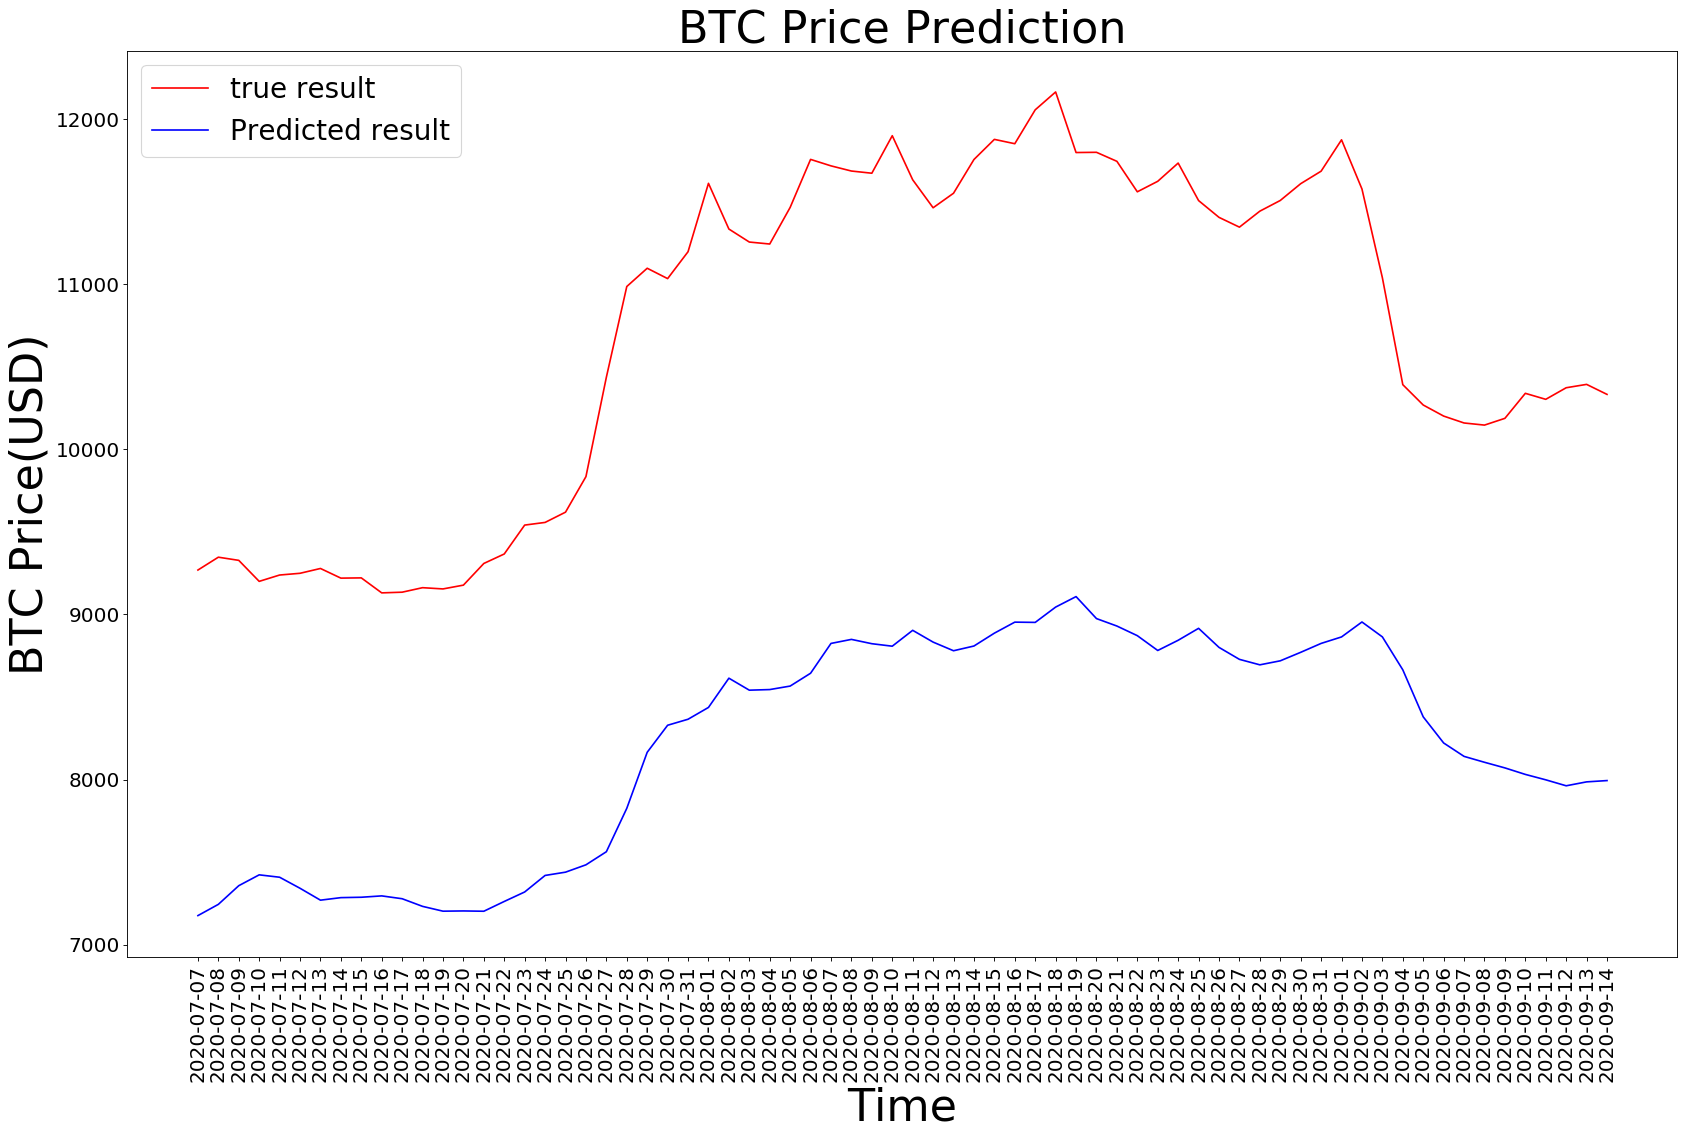

In [15]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(data_test, color = 'red', label = 'true result')
plt.plot(predicted_data, color = 'blue', label = 'Predicted result')
plt.title('BTC Price Prediction', fontsize=40)
close_test = close_test.reset_index()
x=close_test.index
labels = close_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**Here we have the results of our predictions. HMMMM, i know alot of things might be running through your mind also,but let me come out straight to you, As we can see on the chat that we produced with RNN ,to me  i am not satisfied with what am getting.
So let me check LSTM to see if the results can be improved at least,then i can conpare it and see which one i will hold closely.We all know what we want and we need to keep searching for what we want**

## Applying the LSTM 


**Keep going with LSTM method**

**Let me make you aware that...
I will use the same train and test data for the LSTM**

In [38]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.fit(x_train,y_train,epochs=50,batch_size=64)

Epoch 1/50
48/48 [==============================] - 2s 40ms/step - loss: 0.0196
Epoch 2/50
48/48 [==============================] - 3s 56ms/step - loss: 0.0040
Epoch 3/50
48/48 [==============================] - 2s 41ms/step - loss: 0.0022
Epoch 4/50
48/48 [==============================] - 2s 43ms/step - loss: 0.0015
Epoch 5/50
48/48 [==============================] - 3s 59ms/step - loss: 0.0012
Epoch 6/50
48/48 [==============================] - 2s 46ms/step - loss: 9.9980e-04
Epoch 7/50
48/48 [==============================] - 3s 70ms/step - loss: 8.8415e-04
Epoch 8/50
48/48 [==============================] - 2s 49ms/step - loss: 8.0308e-04
Epoch 9/50
48/48 [==============================] - 2s 43ms/step - loss: 7.4411e-04
Epoch 10/50
48/48 [==============================] - 2s 49ms/step - loss: 6.9151e-04
Epoch 11/50
48/48 [==============================] - 2s 36ms/step - loss: 6.5882e-04
Epoch 12/50
48/48 [==============================] - 2s 37ms/step - loss: 6.1502e-04
Epoch 13/

Keep going with test data

In [39]:
inputs=df1[len(df1)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [40]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

it's time to predict

In [41]:
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

In [42]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

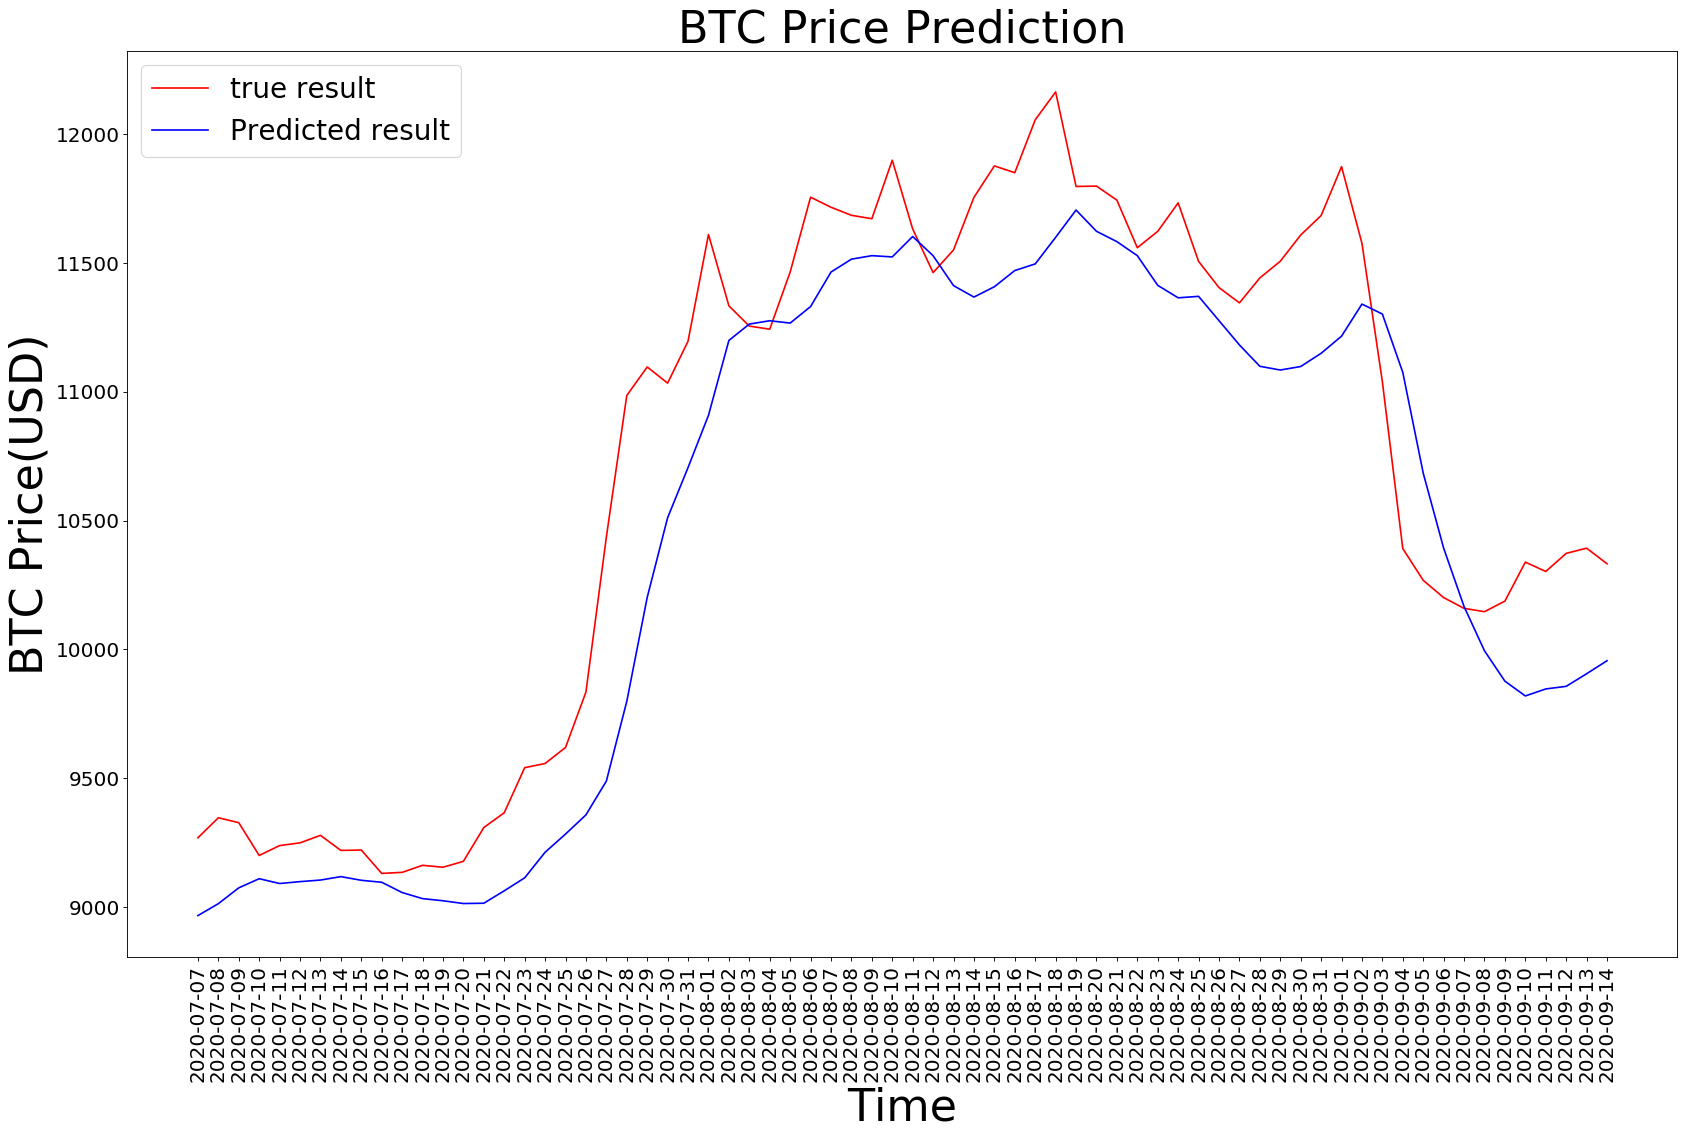

In [43]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(data_test, color = 'red', label = 'true result')
plt.plot(predicted_data, color = 'blue', label = 'Predicted result')
plt.title('BTC Price Prediction', fontsize=40)
close_test = close_test.reset_index()
x=close_test.index
labels = close_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

## Conclusion

**When we compare the both results (RNN and LSTM) we can see that we have better prediction with LSTM. 

**Up to this point I was trying to show the differences between RNN - LSTM and how to use these methods on time series,like i was saying earlier,i wasnt contented with the result i got from the RNN,which made me jumpt into the LSTM standard..and now i cam say am alittle satisfied though** 

If you have any question or you noticed any error please contact to me dirctly.or you can contact me for anything

on

machine learning and also anything on neural networks,we grow everyday

**I AM OLANIPEKUN TEMITOPE SAMSON(DATA SCIENCE MANIAC)**
